# PBMC3k: 50% Cells: 2105 Features: 6843

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Preprocess

In [25]:
import os
path = 'C:/Users/jzhou417/Desktop/pbmc3k/'
if os.path.exists(path):
    files = os.listdir(path)
files

['.ipynb_checkpoints',
 '.Rhistory',
 '1',
 '30',
 '50',
 '60',
 '70',
 '90',
 '90new',
 'barcodes.tsv',
 'Comparison-sc10x-3c.ipynb',
 'cooc',
 'cooc.csv',
 'cooc1',
 'cooc_standard',
 'filtered_feature_bc_matrix',
 'genes.tsv',
 'matrix.mtx',
 'pbmc_orign.ipynb',
 'R.txt',
 'RaceID3.csv',
 'RaceID3new.csv',
 'sc10x-3c-sce.rds',
 'sc10x-3c.rds',
 'sc3_results.xls',
 'sc3_results1.xls',
 'server',
 'seurat-R-stan.csv',
 'seurat-R.csv',
 'seurat-R1.csv',
 'seurat-R8.csv',
 'seurat-Rrs1.csv',
 'web_summary.html']

In [26]:
table = pd.read_csv(os.path.join(path, 'seurat-R-stan.csv'))
table.head(10)

,barcode,seurat_clusters
0,AAACATACAACCAC,3
1,AAACATTGAGCTAC,4
2,AAACATTGATCAGC,1
3,AAACCGTGCTTCCG,5
4,AAACCGTGTATGCG,6
5,AAACGCACTGGTAC,1
6,AAACGCTGACCAGT,3
7,AAACGCTGGTTCTT,3
8,AAACGCTGTAGCCA,3
9,AAACGCTGTTTCTG,5


In [27]:
R_10x = pd.read_csv('seurat-Rrs2.csv')
R_10x["barcode"] = R_10x['Unnamed: 0']
R_10x.pop('Unnamed: 0')
newdata = table.merge(R_10x, on='barcode')
newdata['target'] = newdata['seurat_clusters_x'].factorize()[0]

In [28]:
sc3 = pd.read_excel('sc3_results.xls')
sc3_r = table.merge(sc3, on="barcode")
sc3_r['target'] = sc3_r['seurat_clusters'].factorize()[0]

In [29]:
sc3_r.head(10)

,barcode,seurat_clusters,sc3_10_clusters,sc3_10_log2_outlier_score,target
0,AAACATTGATCAGC,1,3,0.0,0
1,AAACCGTGCTTCCG,5,5,0.0,1
2,AAACCGTGTATGCG,6,9,0.0,2
3,AAACGCACTGGTAC,1,3,0.0,0
4,AAACGCTGTAGCCA,3,6,0.0,3
5,AAACTTGAAAAACG,4,1,0.0,4
6,AAACTTGATCCAGA,0,2,0.0,5
7,AAAGAGACGAGATA,1,3,0.0,0
8,AAAGAGACGCGAGA,2,4,0.0,6
9,AAAGAGACGGACTT,3,6,0.0,3


In [54]:
cooc = pd.read_csv('cooc.csv').T.reset_index()[1:]
cooc["barcode"] = cooc["index"]
cooc["cooc_clusters"] = cooc.loc[:,0]
cooc.pop("index")
cooc.pop(0)
cooc_data = table.merge(cooc, on="barcode")
cooc_data['target'] = cooc_data['seurat_clusters'].factorize()[0]

In [55]:
cooc_data.head(10)

,barcode,seurat_clusters,cooc_clusters,target
0,AAACATACAACCAC,3,6,0
1,AAACATTGAGCTAC,4,4,1
2,AAACATTGATCAGC,1,6,2
3,AAACCGTGCTTCCG,5,2,3
4,AAACCGTGTATGCG,6,2,4
5,AAACGCACTGGTAC,1,6,2
6,AAACGCTGACCAGT,3,6,0
7,AAACGCTGGTTCTT,3,6,0
8,AAACGCTGTAGCCA,3,6,0
9,AAACGCTGTTTCTG,5,2,3


In [32]:
race = pd.read_csv('RaceID3.csv')
race["barcode"] = race["Unnamed: 0"]
race.pop("Unnamed: 0")
race_data = table.merge(race, on="barcode")
race_data['target'] = race_data['seurat_clusters'].factorize()[0]

In [33]:
race_data.head(10)

,barcode,seurat_clusters,V1,target
0,AAACATTGATCAGC,1,1,0
1,AAACCGTGCTTCCG,5,2,1
2,AAACCGTGTATGCG,6,1,2
3,AAACGCACTGGTAC,1,1,0
4,AAACGCTGTAGCCA,3,3,3
5,AAACTTGAAAAACG,4,3,4
6,AAACTTGATCCAGA,0,7,5
7,AAAGAGACGAGATA,1,1,0
8,AAAGAGACGCGAGA,2,4,6
9,AAAGAGACGGACTT,3,1,3


# Cluster Count

In [34]:
def cluster_counts(df, cluster_name, name):
    print("Cluster counts for {}".format(name))
    groups = df.groupby(by = cluster_name)
    return groups["target"].describe()[['count']]

In [35]:
cluster_counts(sc3_r, 'sc3_10_clusters', '3. sc3 10x')

Cluster counts for 3. sc3 10x


,count
sc3_10_clusters,
1,275.0
2,511.0
3,444.0
4,102.0
5,243.0
6,241.0
7,26.0
8,120.0
9,114.0


In [36]:
cluster_counts(cooc_data, 'seurat_clusters', '4. cooc 10x')

Cluster counts for 4. cooc 10x


,count
seurat_clusters,
0,517.0
1,458.0
2,346.0
3,233.0
4,279.0
5,114.0
6,113.0
7,34.0
8,3.0


In [37]:
cluster_counts(cooc_data, 'cooc_clusters', '4. cooc 10x')

Cluster counts for 4. cooc 10x


,count
cooc_clusters,
1,79.0
2,27.0
3,391.0
4,1319.0
5,281.0


# Compare with Seurat

In [38]:
def reorder(df):
    
    dic = {i: np.argmax(df.loc[:,i].values) for i in range(1, len(df.columns)+1)}
    dic = sorted(dic.items(), key = lambda x: x[1])
    df_new = pd.concat([df.loc[:,col] for col, target in dic],axis=1)
    
    # Normalize
    #df_new = df_new.apply(lambda x: x/x.sum(), axis=0)
    
    return df_new

def reorder_seurat(df):
    
    dic = {i: np.argmax(df.loc[:,i].values) for i in range(1, len(df.columns))}
    dic = sorted(dic.items(), key = lambda x: x[1])
    df_new = pd.concat([df.loc[:,col] for col, target in dic],axis=1)
    
    # Normalize
    #df_new = df_new.apply(lambda x: x/x.sum(), axis=0)
    
    return df_new

In [39]:
df_r = pd.crosstab(newdata['target'], newdata['seurat_clusters_y'])
df_r_s = df_r.copy()
df_r_s["sum"] = df_r.sum(axis=1)
df_r_s

seurat_clusters_y,0,1,2,3,4,5,6,7,8,9,10,sum
target,,,,,,,,,,,,
0,325,30,88,0,0,0,12,1,0,0,2,458
1,0,0,0,0,8,1,0,0,105,0,0,114
2,0,0,0,0,0,0,2,110,0,0,1,113
3,11,50,0,0,0,0,158,14,0,0,0,233
4,0,0,0,279,0,0,0,0,0,0,0,279
5,62,236,219,0,0,0,0,0,0,0,0,517
6,0,0,0,0,167,171,0,0,8,0,0,346
7,0,0,0,0,1,1,0,0,0,32,0,34
8,0,0,0,1,0,0,0,0,2,0,0,3


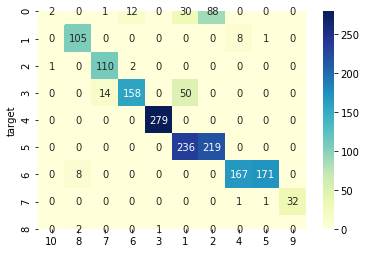

In [40]:
df_r = reorder_seurat(df_r)
sns.heatmap(df_r, cmap="YlGnBu", annot=True, fmt="d")

In [41]:
df_sc3 = pd.crosstab(sc3_r['target'], sc3_r['sc3_10_clusters'])
df_sc3_s = df_sc3.copy()
df_sc3_s["sum"] = df_sc3_s.sum(axis=1)
df_sc3_s

sc3_10_clusters,1,2,3,4,5,6,7,8,9,10,sum
target,,,,,,,,,,,
0,0,102,329,0,0,15,0,0,0,12,458
1,0,0,0,0,5,0,2,106,0,1,114
2,0,0,0,0,0,10,0,0,103,0,113
3,0,4,9,0,0,206,0,0,11,3,233
4,275,0,1,0,0,1,0,0,0,2,279
5,0,405,105,0,0,7,0,0,0,0,517
6,0,0,0,96,234,0,3,13,0,0,346
7,0,0,0,6,4,0,21,0,0,3,34
8,0,0,0,0,0,2,0,1,0,0,3


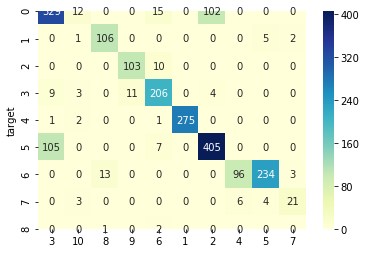

In [42]:
df_sc3 = reorder(df_sc3)
sns.heatmap(df_sc3, cmap="YlGnBu", annot=True, fmt="d")

In [56]:
df_cooc = pd.crosstab(cooc_data['target'], cooc_data[cooc_data['cooc_clusters']<20]['cooc_clusters'])
df_cooc_s = df_cooc.copy()
df_cooc_s["sum"] = df_cooc.sum(axis=1)
df_cooc_s

cooc_clusters,1,2,3,4,5,6,sum
target,,,,,,,
0,0,1,0,1,122,225,349
1,0,2,0,336,0,2,340
2,0,1,1,0,4,506,512
3,147,20,1,0,0,0,168
4,0,1,0,0,143,0,144
5,0,2,0,0,0,587,589
6,93,362,1,0,0,0,456
7,1,8,25,1,0,1,36
8,1,5,0,0,0,0,6


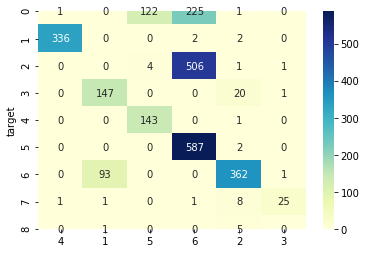

In [57]:
df_cooc = reorder(df_cooc)
sns.heatmap(df_cooc, cmap="YlGnBu", annot=True, fmt="d")

In [48]:
df_race = pd.crosstab(race_data['target'], race_data[race_data['V1']<13]['V1'])
df_race_s = df_race.copy()
df_race_s["sum"] = df_race.sum(axis=1)
df_race_s

V1,1,2,3,4,5,6,7,8,9,10,11,12,sum
target,,,,,,,,,,,,,
0,334,0,1,0,0,0,95,25,0,1,0,0,456
1,3,95,0,0,0,16,0,0,0,0,0,0,114
2,59,0,0,0,0,0,11,9,0,13,5,0,97
3,189,0,1,0,0,0,18,19,0,0,0,0,227
4,6,0,228,0,2,0,36,1,0,0,0,5,278
5,388,0,0,0,0,0,85,43,0,0,0,0,516
6,0,75,1,171,0,71,2,2,21,0,0,1,344
7,0,1,8,2,0,6,3,0,0,0,0,14,34
8,0,1,1,0,0,0,0,0,0,0,0,0,2


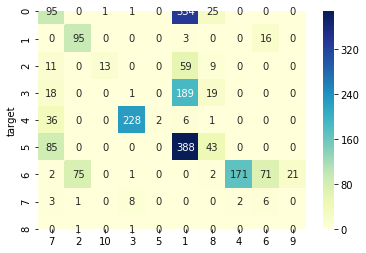

In [49]:
df_race = reorder(df_race)
df_race = df_race.drop(columns = [11,12])
sns.heatmap(df_race, cmap="YlGnBu", annot=True, fmt="d")

# Calculating the metrics

In [50]:
def calc_h_accuracy(df):
    df_norm = df.apply(lambda x: x/x.sum(), axis=0)
    df_entropy = df_norm.apply(lambda x: x*np.log2(x+0.0001))
    return -np.sum(df_entropy.sum(axis=0)) / len(df.columns)

def calc_h_purity(df):
    df_norm = df.apply(lambda x: x/x.sum(), axis=1)
    df_entropy = df_norm.apply(lambda x: x*np.log2(x+0.0001))
    return -np.sum(df_entropy.sum(axis=0)) / len(df)

In [51]:
print("======pbmc3k results======")
print("The entropy of cluster accuracy for seurat R: {:.5f}".format(calc_h_accuracy(df_r)))
print("The entropy of cluster accuracy for sc3: {:.5f}".format(calc_h_accuracy(df_sc3)))
print("The entropy of cluster accuracy for cooc: {:.5f}".format(calc_h_accuracy(df_cooc)))
print("The entropy of cluster accuracy for RaceID3: {:.5f}".format(calc_h_accuracy(df_race)))

======pbmc3k results======
The entropy of cluster accuracy for seurat R: 0.48066
The entropy of cluster accuracy for sc3: 0.68955
The entropy of cluster accuracy for cooc: 0.68011
The entropy of cluster accuracy for RaceID3: 0.87669


In [52]:
print("======pbmc3k results======")
print("The entropy of cluster purity for seurat R: {:.5f}".format(calc_h_purity(df_r)))
print("The entropy of cluster purity for sc3: {:.5f}".format(calc_h_purity(df_sc3)))
print("The entropy of cluster purity for cooc: {:.5f}".format(calc_h_purity(df_cooc)))
print("The entropy of cluster purity for RaceID3: {:.5f}".format(calc_h_purity(df_race)))

======pbmc3k results======
The entropy of cluster purity for seurat R: 0.72123
The entropy of cluster purity for sc3: 0.80973
The entropy of cluster purity for cooc: 0.40199
The entropy of cluster purity for RaceID3: 1.20284


In [53]:
from sklearn.metrics.cluster import adjusted_rand_score
print("======pbmc3k cell lines results======")
print("The ARI for seurat R (resolution=1): {:.5f}".format(adjusted_rand_score(newdata['target'], newdata['seurat_clusters_y'])))
print("The ARI for sc3: {:.5f}".format(adjusted_rand_score(sc3_r['target'], sc3_r['sc3_10_clusters'])))
print("The ARI for cooc: {:.5f}".format(adjusted_rand_score(cooc_data['target'], cooc_data['cooc_clusters'])))
print("The ARI for RaceID3: {:.5f}".format(adjusted_rand_score(race_data['target'], race_data['V1'])))

======pbmc3k cell lines results======
The ARI for seurat R (resolution=1): 0.56109
The ARI for sc3: 0.62868
The ARI for cooc: 0.39237
The ARI for RaceID3: 0.29640
